In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

**STEP 1 : Load the dataset and analyze the data**

In [2]:
from sklearn import datasets
forest_data = datasets.fetch_covtype()

In [3]:
# contains additional attributes apart from actual data(actual feature matrix or the input data of the dataset.)
forest_data

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3]),
 'frame': None,
 'target_names': ['Cover_Type'],
 'feature_names': ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area_0',
  'Wilderness_Area_1',
  'Wilderness_Area_2',
  'Wildernes

In [4]:
# gives different attributes stored in the dataset object. one such attribute is the data
print(forest_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [5]:
# see each keys
print("data is",forest_data.data)                    # feature matrix(input data) for each instance in the dataset(numerical values)
print("target is",forest_data.target)                # class labels(target variable) associated with each instances in the dataset.
print("frame is", forest_data.frame)                 # if the dataset has additional structures other than data and metadata
print("feature names is",forest_data.feature_names)  # name of features or attributes in the dataset.
print("target_names is",forest_data.target_names)    # name of target class
print("Descr is", forest_data.DESCR)                 # description: total samples, dimensionality,etc..

data is [[2.596e+03 5.100e+01 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.590e+03 5.600e+01 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.804e+03 1.390e+02 9.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.386e+03 1.590e+02 1.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.384e+03 1.700e+02 1.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.383e+03 1.650e+02 1.300e+01 ... 0.000e+00 0.000e+00 0.000e+00]]
target is [5 5 2 ... 3 3 3]
frame is None
feature names is ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13',

**STEP 2: Create a DataFrame and see the statistics** (for actual input data)

In [6]:
# df creation with meaningful feature_names for each data in the dataframe
df = pd.DataFrame(data=forest_data.data, columns=forest_data.feature_names)
# Add the target column
df['target'] = forest_data.target
df.shape

(581012, 55)

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [9]:
# statistics computed for each column in the df
summary_stats = df.describe()
print(summary_stats)

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [10]:
# Pandas function to count unique values in the selected column 'target'.
df['target'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: target, dtype: int64

In [11]:
X= forest_data.data
print("shape of X",X.shape)
y=forest_data.target
print("shape of y",y.shape)

shape of X (581012, 54)
shape of y (581012,)


In [12]:
# Assign different colors to the data points based on the 'target' column
# Used to visually distinguish different categories in that column
color_mapping = {1: 'blue', 2: 'green', 3: 'red', 4:'yellow', 5:'purple', 6:'orange', 7:'black'}
colors = [color_mapping[t] for t in df['target']]

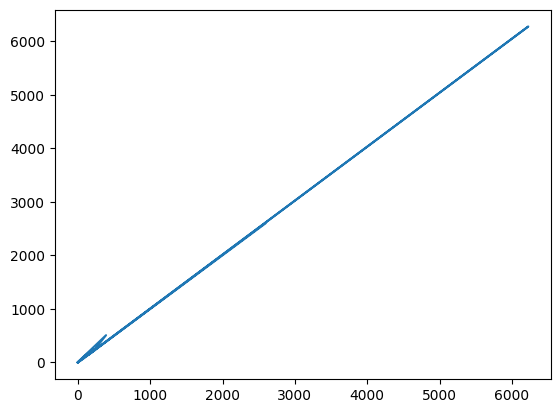

In [13]:
plt.plot(X[1],X[0])

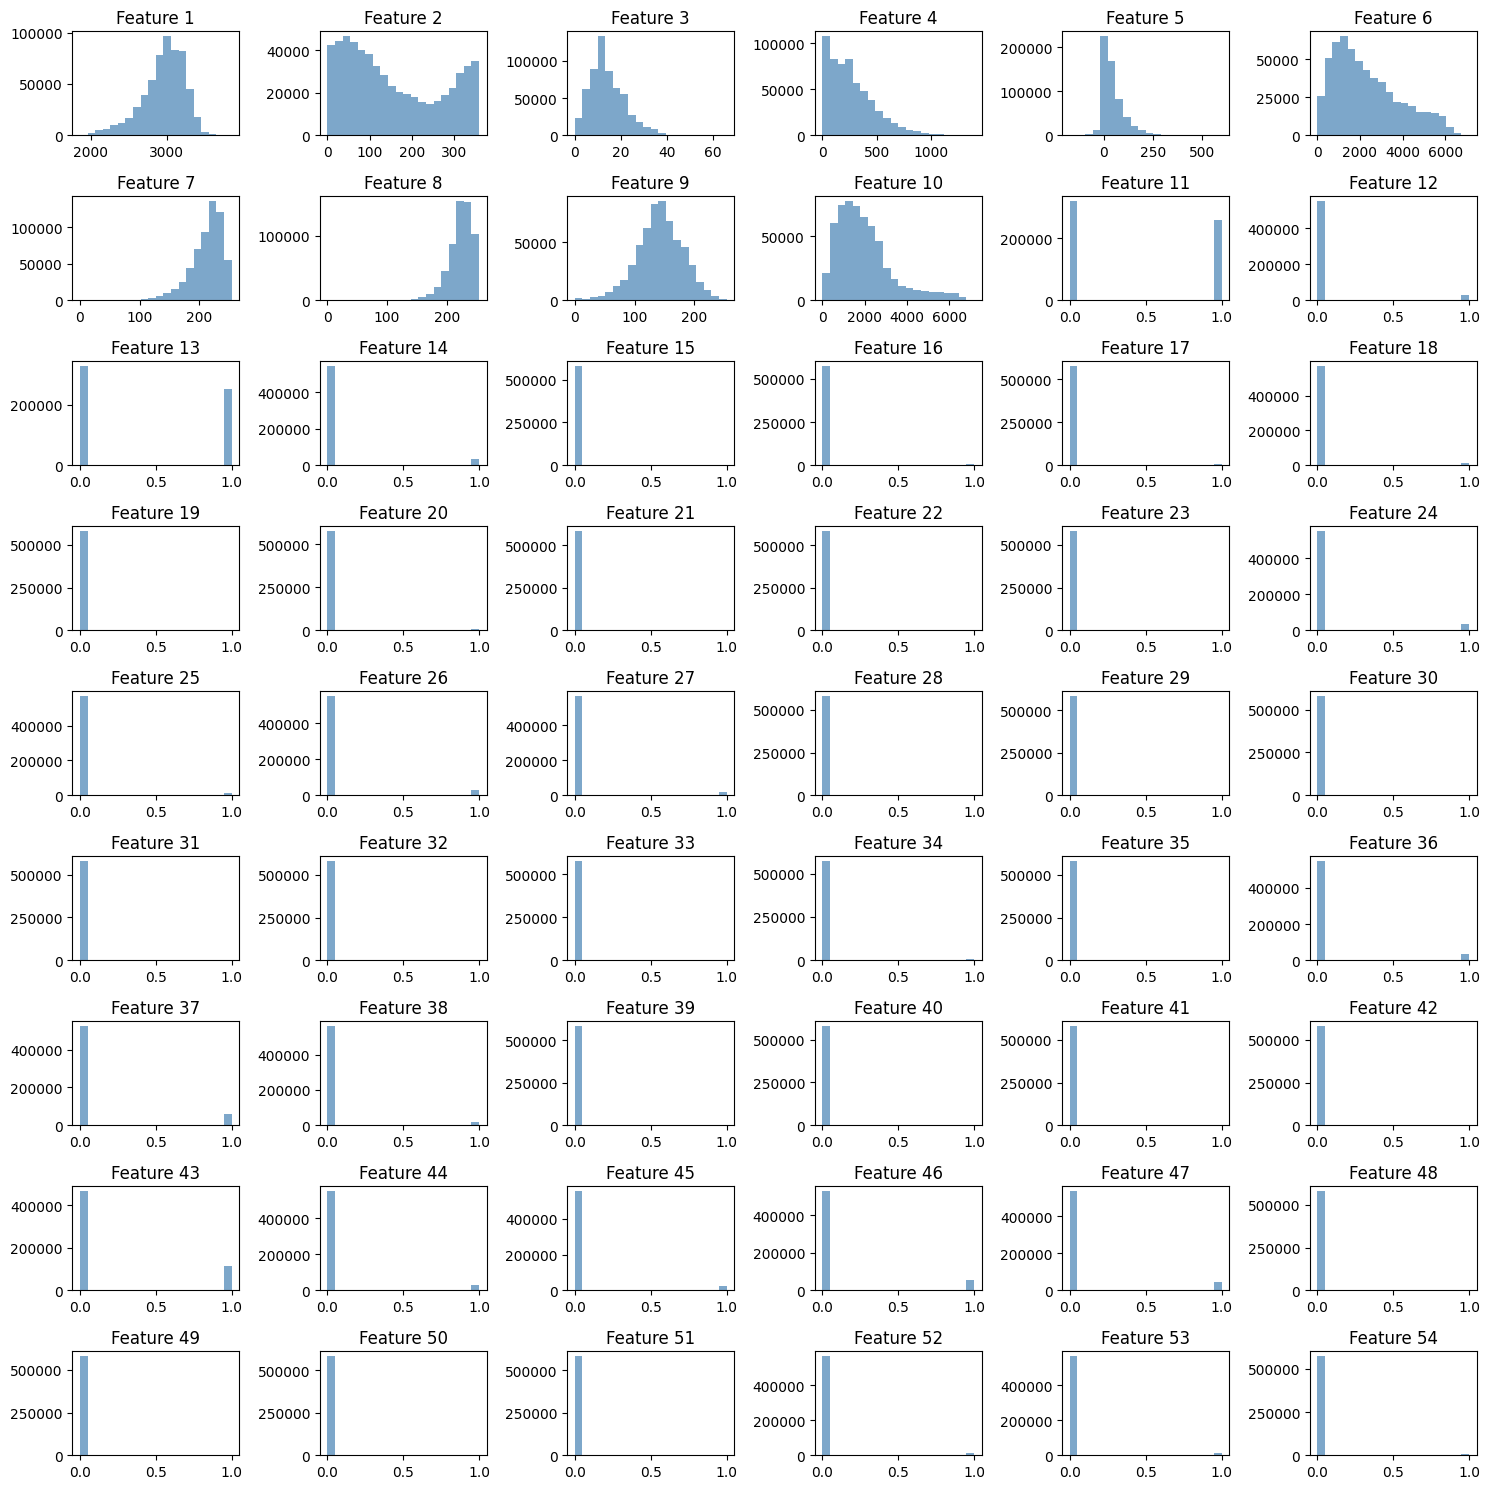

In [62]:
# Histogram to visualize all the 54 attribute
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))                                   # width and height of figure
for i in range(X.shape[1]):                                    # to show histogram of every features
    plt.subplot(9, 6, i+1)                                     # 9 rows, 6 columns
    plt.hist(X[:, i], bins=20, color='steelblue', alpha=0.7)   # select ith column(feature), create 20 equal-sized bins for the selected feature, transparency of bar = 0.7
    plt.title(f'Feature {i+1}')
    plt.tight_layout()                                         # improves spacing/alignment
plt.show()


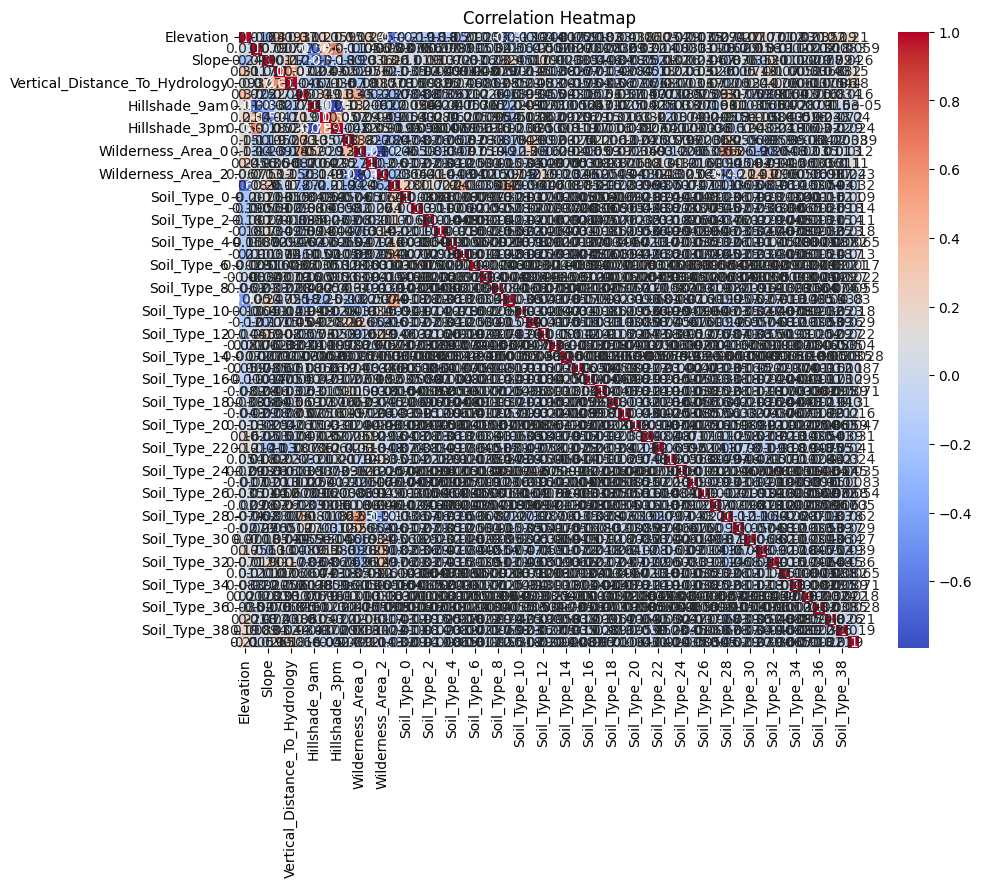

In [54]:
# Heatmap to visualize the correlation coefficients between different pairs of features
# High correlation (+ve or -ve) by bright colors, low correlation by dull colors.
plt.figure(figsize=(10, 8))
sns.heatmap(data=pd.DataFrame(X, columns=forest_data.feature_names[:54]).corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

**STEP 3: Preprocessing**

In [63]:
# Standardizing everything to have a common ground so that magnitude of some feature's value doesn't affect the PCA.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [71]:
# Scaling of the whole dataframe.
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Define new X and y
X_train = df_scaled.drop('target', axis=1).values
y_train = df_scaled['target']
print("shape of new input X",X_train.shape)
print("shape of new output Y",y_train.shape)

shape of new input X (581012, 54)
shape of new output Y (581012,)


In [74]:
print("x train:",X_train[0])
print("y train:",y_train[0])

x train: [-1.29780509e+00 -9.35156981e-01 -1.48281978e+00 -5.37674011e-02
 -7.96272594e-01 -1.18014587e+00  3.30743212e-01  4.39143313e-01
  1.42960399e-01  3.24628306e+00  1.10807983e+00 -2.32859052e-01
 -8.79364021e-01 -2.60672949e-01 -7.24162759e-02 -1.14549042e-01
 -9.14905313e-02 -1.47649250e-01 -5.24997930e-02 -1.06985932e-01
 -1.34443975e-02 -1.75550016e-02 -4.44752360e-02 -2.43946810e-01
 -1.47734423e-01 -2.33216171e-01 -1.75866443e-01 -3.21251264e-02
 -2.27231846e-03 -7.01478695e-02 -7.69715390e-02 -5.72638872e-02
 -8.34800147e-02 -1.27255868e-01 -3.80051874e-02 -2.46859838e-01
 -3.32219214e-01 -1.94973038e-01 -2.85741845e-02 -6.69026389e-02
 -4.32741576e-02 -4.03837703e-02  2.01033582e+00 -2.34031401e-01
 -2.14979610e-01 -3.15238030e-01 -2.90284104e-01 -5.27300460e-02
 -5.71427461e-02 -1.43128266e-02 -2.26530657e-02 -1.65956116e-01
 -1.56013984e-01 -1.23653545e-01]
y train: 2.11136619188962


**STEP 4: Covariance matrix calculation**

In [76]:
# covariance matrix will be 54*54 since X=(581012,54). [each 54 features has covariance with each 54. so 54*54 matrix]

covariance_matrix = np.cov(X_train, rowvar=False)                      # attribute variable = column
print("Covariance matrix shape:", covariance_matrix.shape)
print(covariance_matrix)

Covariance matrix shape: (54, 54)
[[ 1.00000172  0.01573497 -0.24269706 ...  0.21717928  0.19359498
   0.21261269]
 [ 0.01573497  1.00000172  0.07872855 ...  0.01770588  0.00829429
  -0.00586559]
 [-0.24269706  0.07872855  1.00000172 ... -0.07220777  0.0936021
   0.02563696]
 ...
 [ 0.21717928  0.01770588 -0.07220777 ...  1.00000172 -0.02589152
  -0.0205211 ]
 [ 0.19359498  0.00829429  0.0936021  ... -0.02589152  1.00000172
  -0.01929172]
 [ 0.21261269 -0.00586559  0.02563696 ... -0.0205211  -0.01929172
   1.00000172]]


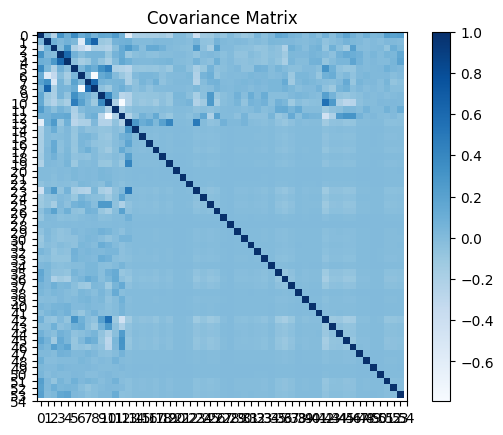

In [81]:
# Visualize covariance matrix
plt.imshow(covariance_matrix, cmap='Blues', interpolation='nearest')   # nearest = sharp interpolation of color values on pixel= sharp edges
plt.colorbar()
plt.title('Covariance Matrix')
plt.xticks(np.arange(55), np.arange(55))   #tick labels on axes changed from 0 to 54
plt.yticks(np.arange(55), np.arange(55))
plt.show()

**STEP 5: Eigen vectors/values calculation**

In [82]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("shape of eigenvalue:",eigenvalues.shape)
print("shape of eigen vectors:",eigenvectors.shape)
print("eigen values are",eigenvalues)
print("eigen vectors are",eigenvectors)

shape of eigenvalue: (54,)
shape of eigen vectors: (54, 54)
eigen values are [ 3.69980049e+00  2.92060872e+00  2.39812651e+00  2.00298429e+00
  3.29870731e-03  1.36096410e-01  1.55695062e-01  1.52108562e+00
  1.46288583e+00  2.51339648e-01  2.88940993e-01  3.26885655e-01
  4.15721936e-01  4.60319750e-01  3.89835904e-15 -1.45642938e-14
  6.33859030e-01  6.43922342e-01  1.22850696e+00  8.05878757e-01
  8.25368884e-01  1.16581934e+00  1.10314659e+00  1.08425383e+00
  1.07408896e+00  1.06742497e+00  1.05475959e+00  9.79693760e-01
  1.03839150e+00  1.03634812e+00  1.03234408e+00  1.02651259e+00
  1.02458591e+00  1.02168640e+00  1.01645687e+00  1.01431003e+00
  1.01348390e+00  1.01026950e+00  1.00916096e+00  1.00781285e+00
  1.00656452e+00  1.00631467e+00  1.00001303e+00  1.00022879e+00
  1.00046429e+00  1.00074236e+00  1.00099775e+00  1.00124009e+00
  1.00230668e+00  1.00303562e+00  1.00438105e+00  1.00376812e+00
  1.00402842e+00  1.00413219e+00]
eigen vectors are [[-2.41720266e-01  3.72187

**STEP 6: See the variance explained by each eigen values.**

In [85]:
# Element wise array division to obtain a new array
# proportion_of_variance array provides insights into relative importance of each PC in capturing the overall variance in the dataset
proportion_of_variance = eigenvalues/sum(eigenvalues)
proportion_of_variance

array([ 6.85147059e-02,  5.40852536e-02,  4.44096737e-02,  3.70922378e-02,
        6.10870672e-05,  2.52029955e-03,  2.88323692e-03,  2.81682037e-02,
        2.70904317e-02,  4.65442992e-03,  5.35074993e-03,  6.05342764e-03,
        7.69854113e-03,  8.52442515e-03,  7.21917097e-17, -2.69708680e-16,
        1.17381100e-02,  1.19244673e-02,  2.27500897e-02,  1.49236550e-02,
        1.52845827e-02,  2.15892098e-02,  2.04286054e-02,  2.00787401e-02,
        1.98905021e-02,  1.97670951e-02,  1.95325514e-02,  1.81424458e-02,
        1.92294391e-02,  1.91915987e-02,  1.91174501e-02,  1.90094598e-02,
        1.89737804e-02,  1.89200860e-02,  1.88232431e-02,  1.87834867e-02,
        1.87681880e-02,  1.87086622e-02,  1.86881338e-02,  1.86631689e-02,
        1.86400516e-02,  1.86354248e-02,  1.85187280e-02,  1.85227235e-02,
        1.85270846e-02,  1.85322340e-02,  1.85369635e-02,  1.85414513e-02,
        1.85612030e-02,  1.85747018e-02,  1.85996171e-02,  1.85882665e-02,
        1.85930869e-02,  

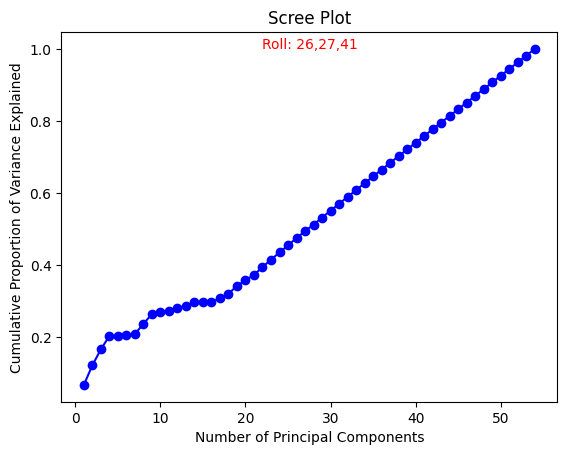

In [91]:
# Plot a scree plot to visualize how much variance is captured by which PC
cumulative_variance = np.cumsum(proportion_of_variance)                                               # sum
plt.plot(range(1, len(proportion_of_variance) + 1), cumulative_variance, marker='o', color='blue')    # range(1 to 54) on x axis, cummulative pov on y axis
varlegend= "Roll: 26,27,41"
plt.text(22,1,varlegend,color='red')                                                               # plot(x_position,y_position,varlegend,color)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

**STEP 7: Select the eigen vectors as needed to compute the final output**
Formula:
New data (Y) = Row feature vector * Row data

In [92]:
# Transpose data into row wise
transposed_X_train = np.transpose(X_train)
print("shape of transposed x train is",transposed_X_train.shape)
# Transpose eigen vectors into row wise for row feature vector
eigenvectors_transposed=np.transpose(eigenvectors)

shape of transposed x train is (54, 581012)


In [94]:
# Dictionary to store the final Y(because we want to have multiple Y, each obtained by selecting our choice of combination of PC).
Y = {}
selected_components = [[0], [0, 1], [0,3], [2,3], [0,53]]                       # best PC, 2 best PCs, best+medium, medium+medium, best+worst
count=len(selected_components)

# Iterate over the selected components
for i in range (0,count):
  selected_eigenvectors = eigenvectors_transposed[selected_components[i]]       # select the combination of components from above list
  Y[i] = np.transpose(selected_eigenvectors @ transposed_X_train)               # projection
  print(Y[i].shape)

(581012, 1)
(581012, 2)
(581012, 2)
(581012, 2)
(581012, 2)


**STEP 8: Computing and visualizing covariance for the new data.**

In [100]:
# Dictionary to store all covariance matrices(obtained by selecting our choice of combination of PC).
new_covariance_matrices_dictionary = {}
for i in range(0, count):
  new_covariance_matrix = np.cov(Y[i], rowvar=False)
  new_covariance_matrices_dictionary[i] = new_covariance_matrix                               # Combination:
  print("*Covariance matrix shape for combination",i,"is", new_covariance_matrix.shape)       # 0=best PC, 1=2 best PCs, 2= best+medium PCs
  print("-->Covariance matrix:",new_covariance_matrices_dictionary[i])                        # 3=medium+medium PCs, 4= best+worst PCs

*Covariance matrix shape for combination 0 is ()
-->Covariance matrix: 3.699800488017358
*Covariance matrix shape for combination 1 is (2, 2)
-->Covariance matrix: [[ 3.69980049e+00 -3.57607799e-15]
 [-3.57607799e-15  2.92060872e+00]]
*Covariance matrix shape for combination 2 is (2, 2)
-->Covariance matrix: [[ 3.69980049e+00 -6.49020194e-15]
 [-6.49020194e-15  2.00298429e+00]]
*Covariance matrix shape for combination 3 is (2, 2)
-->Covariance matrix: [[ 2.39812651e+00 -4.10416879e-15]
 [-4.10416879e-15  2.00298429e+00]]
*Covariance matrix shape for combination 4 is (2, 2)
-->Covariance matrix: [[ 3.69980049e+00 -2.06545115e-15]
 [-2.06545115e-15  1.00413219e+00]]


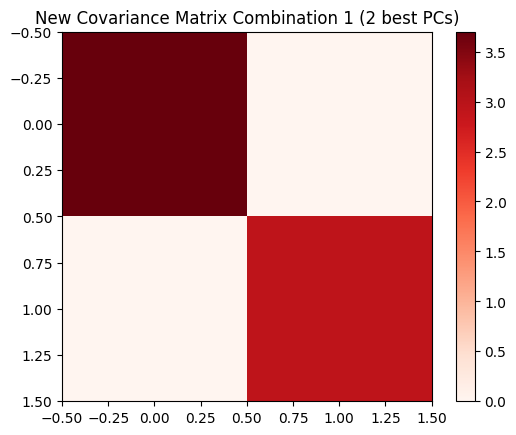

In [102]:
# Heatmap to visualize covariance matrix combination.
plt.imshow(new_covariance_matrices_dictionary[1], cmap='Reds', interpolation='nearest')  #instead of 'nearest', we can use 'bilinear','bicubic','spline16', 'spline36', 'hanning', 'hamming', 'hermite',etc..
plt.colorbar()
plt.title("New Covariance Matrix Combination 1 (2 best PCs)")
plt.show()

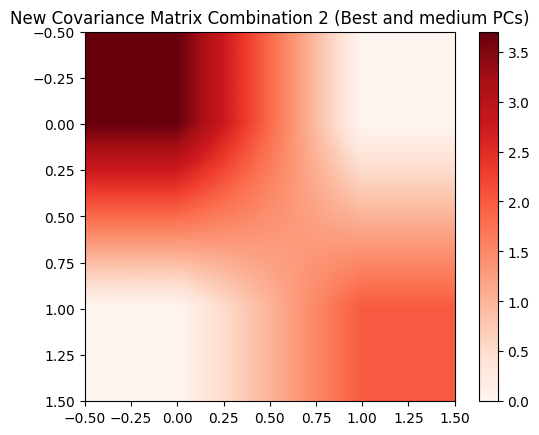

In [105]:
#lets try bilinear,pixel coloring is smoother(linear interpolation between 4 nearest data points)
plt.imshow(new_covariance_matrices_dictionary[2], cmap='Reds', interpolation='bilinear')
plt.colorbar()
plt.title("New Covariance Matrix Combination 2 (Best and medium PCs)")
plt.show()

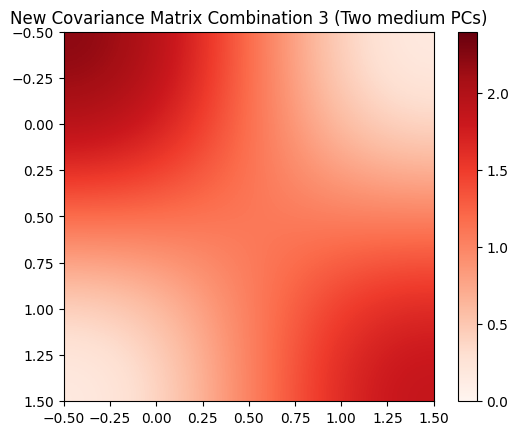

In [106]:
#lets try bicubic,pixel coloring is again smoother(linear interpolation based on 16 nearest data points)
plt.imshow(new_covariance_matrices_dictionary[3], cmap='Reds', interpolation='bicubic')
plt.colorbar()
plt.title("New Covariance Matrix Combination 3 (Two medium PCs)")
plt.show()

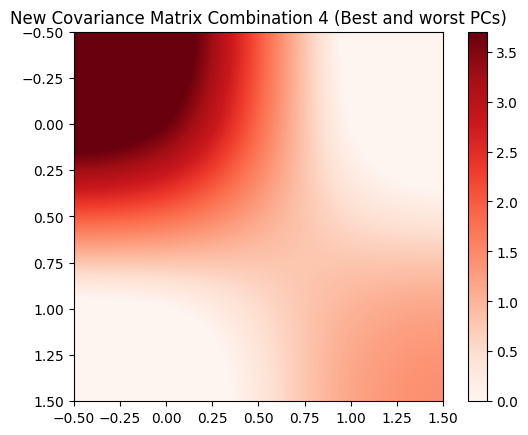

In [108]:
#lets try spline16,pixel coloring is even smoother(16 degree of polynomial used for interpolation, for flexibility)
plt.imshow(new_covariance_matrices_dictionary[4], cmap='Reds', interpolation='spline16')
plt.colorbar()
plt.title("New Covariance Matrix Combination 4 (Best and worst PCs)")
plt.show()

**STEP 9:Visualize the final output**

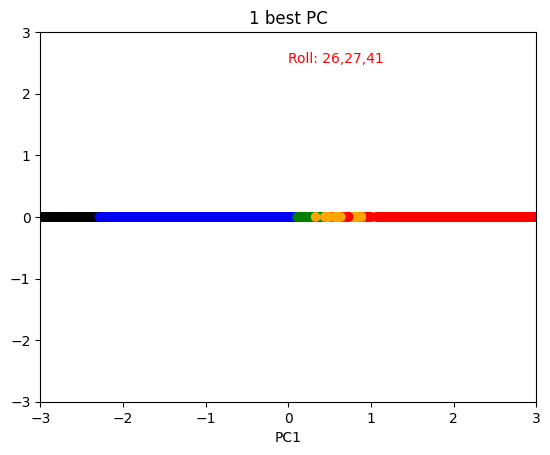

In [115]:
#Combination 0 = Y[0] = Best PC
plt.ylim(-3,3)
plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(0,2.5,varlegend,color='red')
plt.title("1 best PC")
plt.xlabel('PC1')
plt.scatter(Y[0], np.zeros_like(Y[0]), c=colors)   # color_mapping = {1: 'blue', 2: 'green', 3: 'red', 4:'yellow', 5:'purple', 6:'orange', 7:'black'}
                                                   # colors = [color_mapping[t] for t in new_df['target']]

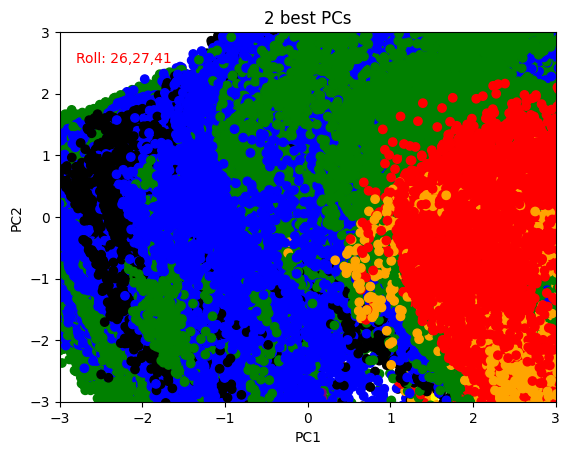

In [117]:
# Combination 1 = Y[1] = 2 best PCs
plt.ylim(-3,3)
plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(-2.8,2.5,varlegend,color='red')
plt.title("2 best PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(Y[1][:,0],Y[1][:,1],c=colors)

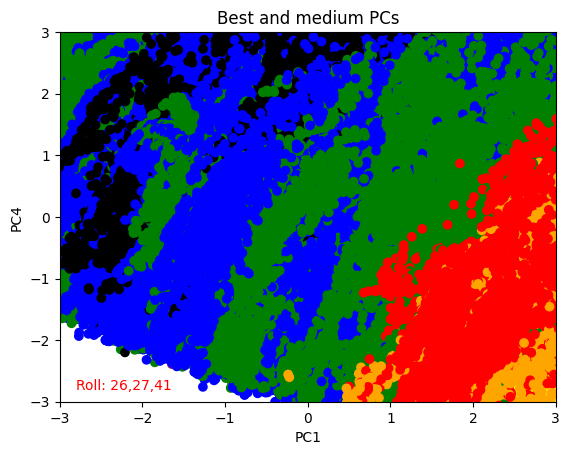

In [120]:
# Combination 2 = Y[2] = Best and medium PCs
plt.ylim(-3,3)
plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(-2.8,-2.8,varlegend,color='red')
plt.title("Best and medium PCs")
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.scatter(Y[2][:,0],Y[2][:,1],c=colors)

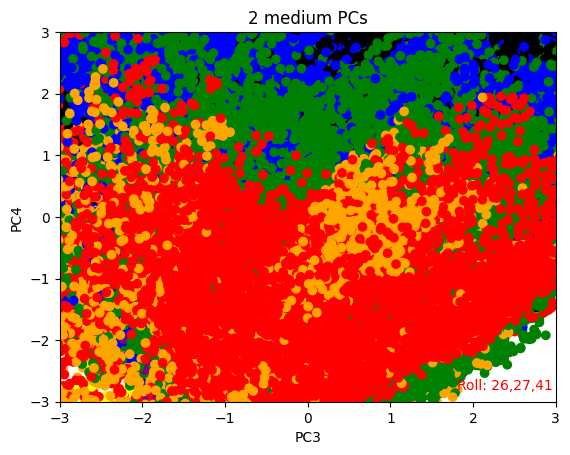

In [125]:
# Combination 3 = Y[3] = 2 medium PCs
plt.ylim(-3,3)
plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(1.8,-2.8,varlegend,color='red')
plt.title("2 medium PCs")
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.scatter(Y[3][:,0],Y[3][:,1],c=colors)

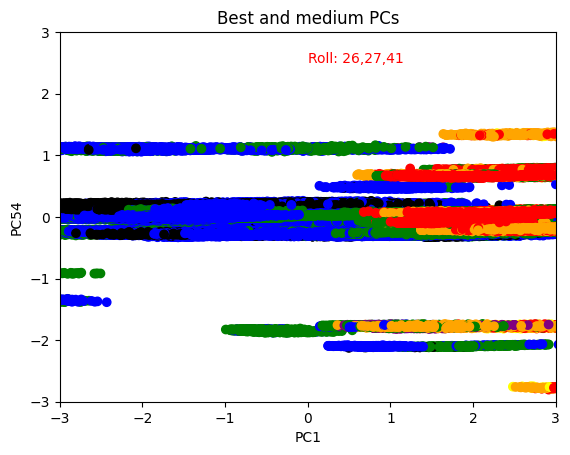

In [124]:
# Combination 4 = Y[4] = Best and worst PCs
plt.ylim(-3,3)
plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(0,2.5,varlegend,color='red')
plt.title("Best and medium PCs")
plt.xlabel('PC1')
plt.ylabel('PC54')
plt.scatter(Y[4][:,0],Y[4][:,1],c=colors)

**STEP 10: PCA using library**

In [128]:
from sklearn.decomposition import PCA
# Create instances of PCA with the desired number of components. (pca1 = 2components. pca2=so as to retain 95% info)
pca1 = PCA(n_components=2)
pca2 = PCA(0.95)

# Fit the PCA model to the data and transform the data
reduced_data1 = pca1.fit_transform(X_train)
reduced_data2 = pca2.fit_transform(X_train)

# Print the shape of the reduced data
print("Shape of reduced data:", reduced_data1.shape)
print("reduced through first",reduced_data1)
print("Shape of reduced data:", reduced_data2.shape)
print("reduced through second",reduced_data2)

Shape of reduced data: (581012, 2)
reduced through first [[-2.43971896  1.27735371]
 [-2.45224487  1.22910184]
 [-2.72304858  0.74606725]
 ...
 [ 2.05436273  1.06140626]
 [ 2.04627148  0.7582439 ]
 [ 1.95949936  0.77564547]]
Shape of reduced data: (581012, 43)
reduced through second [[-2.43972514  1.27718078 -0.85059458 ... -1.08150248  0.21621162
   0.59210341]
 [-2.45224954  1.22892306 -1.02092258 ... -1.07400244  0.32054611
   0.49647348]
 [-2.72328062  0.74443172 -0.62631904 ... -0.10991512  0.41677358
   0.80056971]
 ...
 [ 2.05504632  1.05861261  0.08263807 ... -0.2248506   1.05222469
   0.76163837]
 [ 2.04695476  0.75542805 -0.26992498 ... -0.21980639  1.05187047
   0.6791907 ]
 [ 1.96019442  0.77283107 -0.22596058 ... -0.21278835  1.02590911
   0.62241701]]


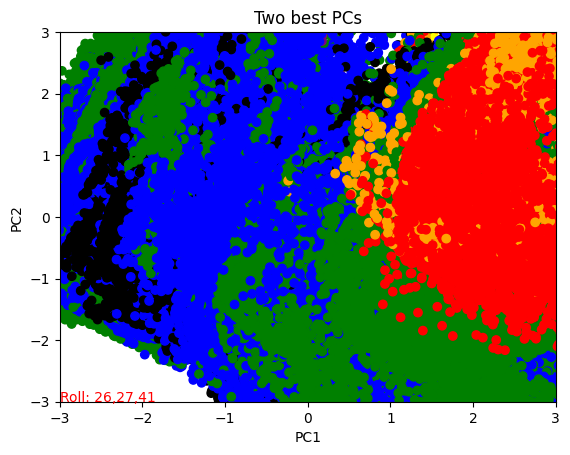

In [134]:
# Visualize the output for the first PCA done by library
plt.ylim(-3,3)
plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(-3,-3,varlegend,color='red')
plt.title("Two best PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(reduced_data1.T[0],reduced_data1.T[1], c= colors) # After applying transform method of PCA,Each row was represented as a sample. So need to transpose.

<Figure size 640x480 with 0 Axes>

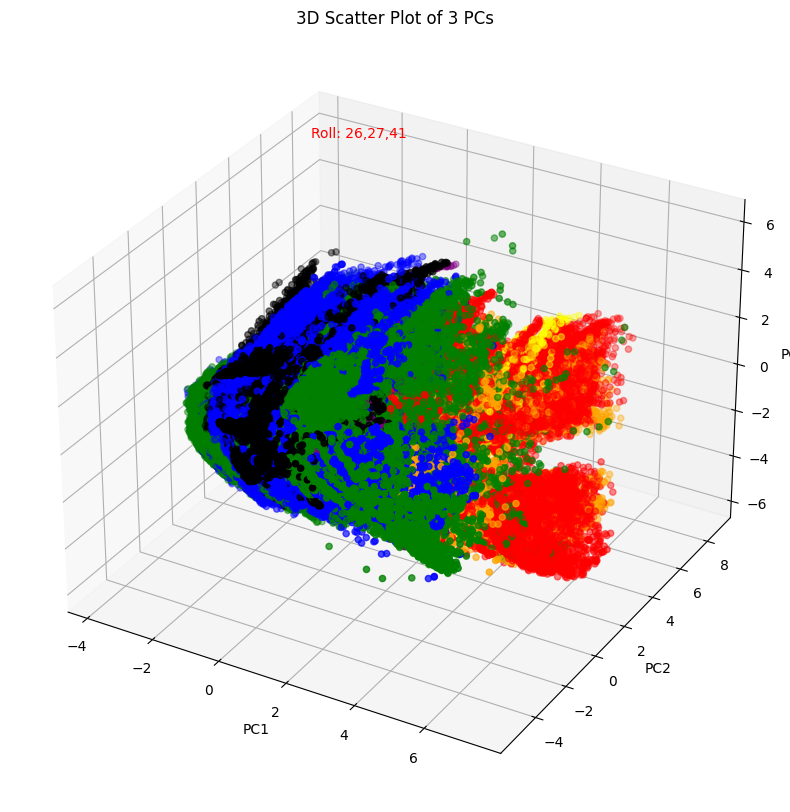

In [136]:
# For the 2nd PCA done by library(retain 95% info), 43 components were required! We will try to plot 3d scatter plot to visualize.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
varlegend= "Roll: 26,27,41"
ax.text(-4,8,6,varlegend,color='red')
ax.scatter(reduced_data2.T[0],reduced_data2.T[1],reduced_data2.T[2],c=colors)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of 3 PCs')
plt.show()

For the next step, we can train a model and compare the performance to see the impact of PCA we did so far.